# Run the whole deltas algorithm

In [10]:
%load_ext autoreload
%autoreload 2

import deltas
from deltas.pipeline import data, classifier, evaluation
from deltas.model import downsample

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Get data

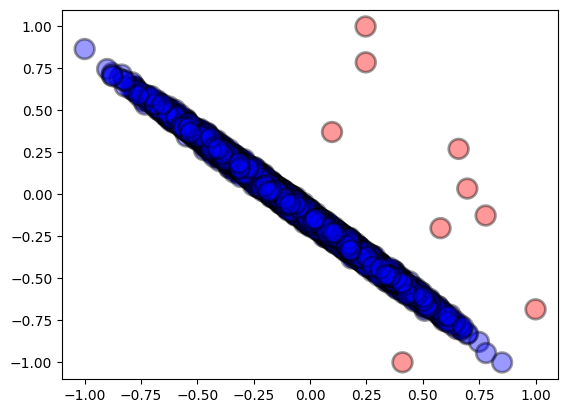

In [11]:
N1 = 9990
N2 = 10
data_clf = data.get_non_sep_data(
    N1=N1,
    N2=N2,
    scale=True)
deltas.plotting.plots.plot_classes(data_clf['data'])

## Get Classifier

clf


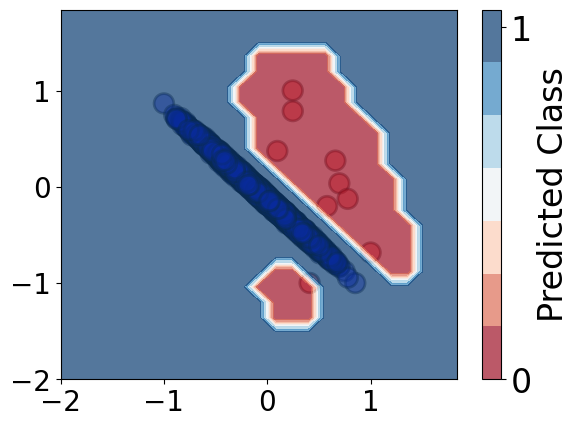

SMOTE


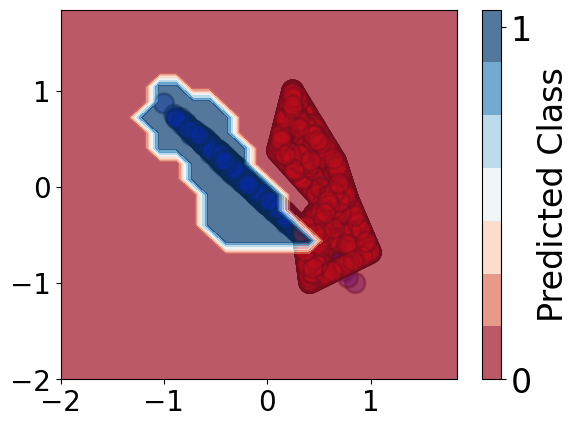

In [12]:
model = 'SVM-linear'
model = 'SVM-rbf'
# model = 'Linear'
# model = 'MLP'
classifiers_dict = classifier.get_classifier(
                      data_clf=data_clf,
                      model=model,
                      balance_clf=False)
data_clf['clf'] = classifiers_dict['Baseline']                      

## Fit deltas

Original Data


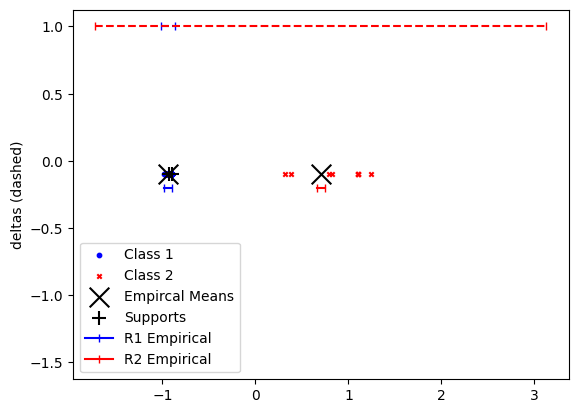

With budget 10000 have found 2673 viable downsampled solutions
Best solution found by removing 195 data points
Downsampled Data:


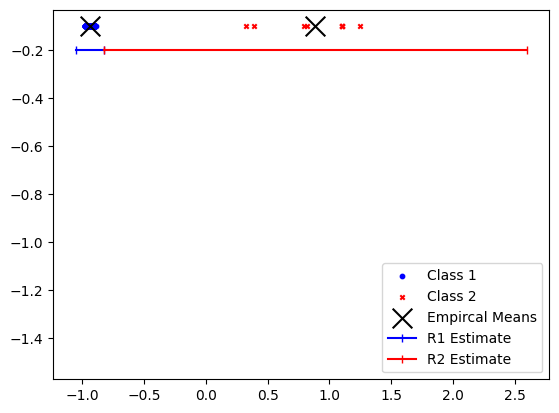

In [13]:
X = data_clf['data']['X']
y = data_clf['data']['y']
clf = data_clf['clf']
# deltas_model = model_deltas.reprojection_deltas(
deltas_model = downsample.downsample_deltas(
    clf,
).fit(X, y, alpha=1000, _print=True, _plot=True, max_trials=10000, parallel=True)

## Show parameters

In [14]:
deltas_model.print_params()
deltas_model.print_deltas()

Parameters
                R:  1.2462272492942128
                N1: 9796
                N2: 9
                R1: 0.04727011512544044
                R2: 0.5630626864421657
                M:  1.215475141903776
                D:  1.825807943471382
                C1: 1
                C2: 1
"
                  delta1: 0.0047995299529953 
                  delta2: 0.7455684304828718
                  constraint: 0.0
                  


# Evaluation on test data

original accuracy: 0.80275
SMOTE accuracy: 0.955
deltas accuracy: 0.9482

original F1: 0.7542821550918717
SMOTE F1: 0.9536894103118246
deltas F1: 0.945370175068551

original precision0: 0.7171029042667623
SMOTE precision0: 0.9306265379519213
deltas precision0: 0.9061254077564335

original precision1: 1.0
SMOTE precision1: 0.9822980708077168
deltas precision1: 1.0

original


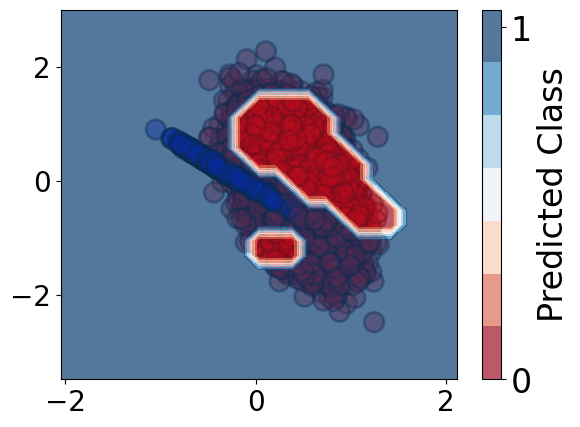

SMOTE


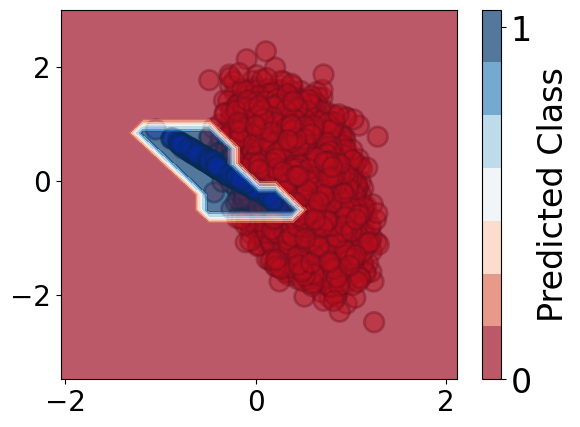

deltas


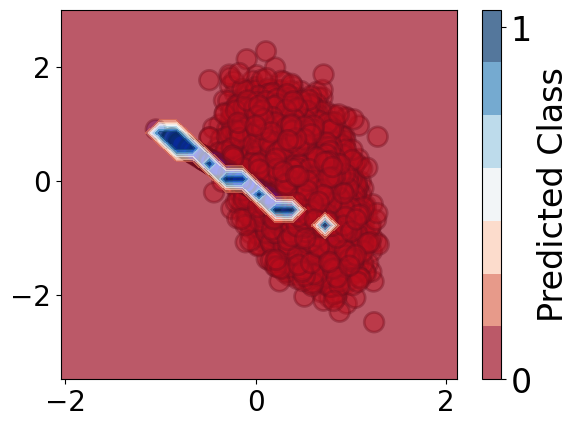

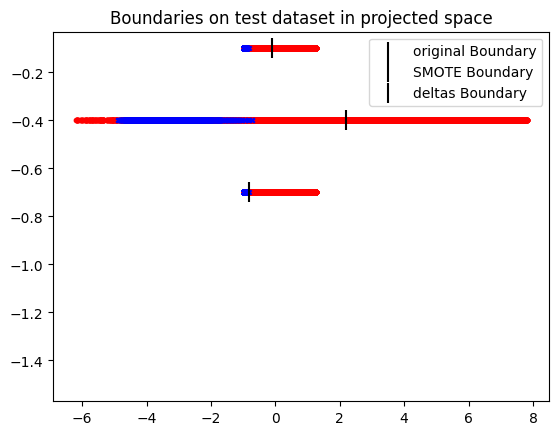

In [18]:
classifiers_dict['Our Method'] = deltas_model
evaluation.eval_test(classifiers_dict,
                       data_clf['data_test'], _print=True, _plot=True)